# Députés correspondants

In [116]:
import networkx as nx

In [117]:
# On sélectionne tous les auteurs contenus dans les lettres
oter = dfhi['ref_auteur']
auteurs = dfhi[['nom_auteur','ref_auteur','groupe_auteur']].groupby('ref_auteur').first()
auteurs['nombre_lettres'] = dfhi.groupby('ref_auteur').count()['question']
oterdic = auteurs.nom_auteur
mat_adj = pd.DataFrame(columns = auteurs.index, index = auteurs.index).fillna(0)

# On ajoute 1 par nombre de lettres envoyées dans le même cluster
G = nx.Graph()
LIMIT_NB_CLUSTERS = 200
for idc in list(dc.keys())[:LIMIT_NB_CLUSTERS] :
    for i,l1 in enumerate(dc[idc]):
        for j,l2 in enumerate(dc[idc][i+1:]):
            a1 = oter[l1]
            a2 = oter[l2]
            G.add_edge(a1, a2)
            try :
                G[a1][a2]['weight']+=1
            except :
                G[a1][a2]['weight']=1

In [118]:
from networkx.drawing.nx_pydot import write_dot

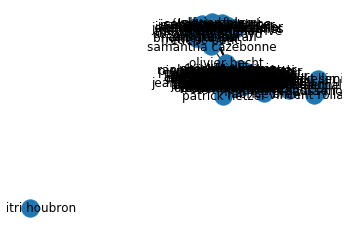

In [126]:
SEUIL = 7
G2 = nx.Graph()
for a1,a2,w in G.edges(data=True):
    if w['weight'] > SEUIL :
        G2.add_edge(oterdic[a1], oterdic[a2])
#             try :
#                 G[a1][a2]['weight']+=1
#             except :
#                 G[a1][a2]['weight']=1
plt.plot(figsize = (20,10))
nx.draw(G2,with_labels=True)
write_dot(G2, 'mieux.dot')

In [120]:
# Créer le graph ps
# !dot -Tps mieux.dot -o mieux.ps

^C


In [121]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 20]
pos = nx.spring_layout(G)  # positions for all nodes

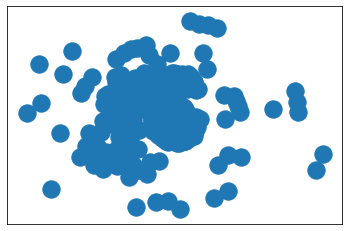

In [122]:
# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge)
# nodes
nx.draw_networkx_nodes(G, pos)

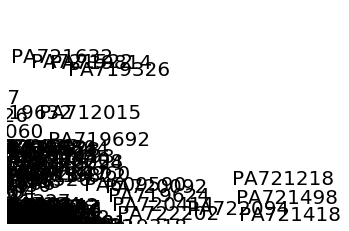

In [123]:
# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()